In [2]:
import pandas as pd
import yfinance as yf

In [3]:
tickers = ["^GSPC", "DX-Y.NYB", "GC=F", "CL=F", "EURUSD=X", "EURGBP=X", "USDJPY=X", "EURJPY=X"]

In [4]:
share_data = yf.download(  # download Df with historical data
                                        tickers=" ".join(tickers),
                                        period="max",
                                        interval="1d",
                                        group_by='ticker',
                                        auto_adjust=True,
                                        prepost=True,
                                        threads=True,
                                        proxy=None)

[*********************100%***********************]  8 of 8 completed


In [5]:
share_data

EURJPY=X                                                  CL=F  \
                  Open        High         Low       Close Volume       Open   
Date                                                                           
1927-12-30         NaN         NaN         NaN         NaN    NaN        NaN   
1928-01-03         NaN         NaN         NaN         NaN    NaN        NaN   
1928-01-04         NaN         NaN         NaN         NaN    NaN        NaN   
1928-01-05         NaN         NaN         NaN         NaN    NaN        NaN   
1928-01-06         NaN         NaN         NaN         NaN    NaN        NaN   
...                ...         ...         ...         ...    ...        ...   
2023-07-07  156.759995  156.921005  155.388000  156.759995    0.0  71.889999   
2023-07-10  155.949997  156.660995  155.334000  155.949997    0.0  73.860001   
2023-07-11  155.490997  155.651001  154.192001  155.490997    0.0  73.190002   
2023-07-12  154.309006  154.270996  153.537994  154.309006    0.0  74.830002   
2023-07-13  154.029999  154.610001  153.875000  154.304993    0.0  75.849998   

                                                       ... EURGBP=X           \
                 High        Low      Close    Volume  ...     Open     High   
Date                                                   ...                     
1927-12-30        NaN        NaN        NaN       NaN  ...      NaN      NaN   
1928-01-03        NaN        NaN        NaN       NaN  ...      NaN      NaN   
1928-01-04        NaN        NaN        NaN       NaN  ...      NaN      NaN   
1928-01-05        NaN        NaN        NaN       NaN  ...      NaN      NaN   
1928-01-06        NaN        NaN        NaN       NaN  ...      NaN      NaN   
...               ...        ...        ...       ...  ...      ...      ...   
2023-07-07  73.919998  71.190002  73.860001  362632.0  ...   0.8546  0.85535   
2023-07-10  74.150002  72.669998  72.989998  301014.0  ...   0.8544  0.85832   
2023-07-11  74.959999  72.980003  74.830002  326883.0  ...   0.8555  0.85606   
2023-07-12  76.150002  74.669998  75.750000  326883.0  ...   0.8512  0.85632   
2023-07-13  76.139999  75.709999  75.980003   16870.0  ...      NaN      NaN   

                                          ^GSPC                            \
                Low   Close Volume         Open         High          Low   
Date                                                                        
1927-12-30      NaN     NaN    NaN    17.660000    17.660000    17.660000   
1928-01-03      NaN     NaN    NaN    17.760000    17.760000    17.760000   
1928-01-04      NaN     NaN    NaN    17.719999    17.719999    17.719999   
1928-01-05      NaN     NaN    NaN    17.549999    17.549999    17.549999   
1928-01-06      NaN     NaN    NaN    17.660000    17.660000    17.660000   
...             ...     ...    ...          ...          ...          ...   
2023-07-07  0.85256  0.8546    0.0  4404.540039  4440.390137  4397.399902   
2023-07-10  0.85419  0.8544    0.0  4394.229980  4412.600098  4389.919922   
2023-07-11  0.85045  0.8555    0.0  4415.549805  4443.640137  4408.459961   
2023-07-12  0.85050  0.8512    0.0  4467.689941  4488.339844  4463.229980   
2023-07-13      NaN     NaN    NaN          NaN          NaN          NaN   

                                       
                  Close        Volume  
Date                                   
1927-12-30    17.660000  0.000000e+00  
1928-01-03    17.760000  0.000000e+00  
1928-01-04    17.719999  0.000000e+00  
1928-01-05    17.549999  0.000000e+00  
1928-01-06    17.660000  0.000000e+00  
...                 ...           ...  
2023-07-07  4398.950195  3.630480e+09  
2023-07-10  4409.529785  3.429600e+09  
2023-07-11  4439.259766  3.624220e+09  
2023-07-12  4472.160156  3.920290e+09  
2023-07-13          NaN           NaN  

[24351 rows x 40 columns]

In [6]:
close_data = share_data.xs('Close', level=1, axis=1)

In [9]:
close_data.dropna().corr()

,EURJPY=X,CL=F,USDJPY=X,EURUSD=X,GC=F,DX-Y.NYB,EURGBP=X,^GSPC
EURJPY=X,1.000000,0.101285,0.651873,0.210858,-0.449436,-0.046164,-0.471450,0.026600
CL=F,0.101285,1.000000,-0.278233,0.518494,0.277720,-0.491466,0.150448,-0.059303
USDJPY=X,0.651873,-0.278233,1.000000,-0.595876,-0.087444,0.715387,-0.261223,0.537706
EURUSD=X,0.210858,0.518494,-0.595876,1.000000,-0.318638,-0.967292,-0.121146,-0.652687
GC=F,-0.449436,0.277720,-0.087444,-0.318638,1.000000,0.311772,0.744734,0.689119
DX-Y.NYB,-0.046164,-0.491466,0.715387,-0.967292,0.311772,1.000000,0.179765,0.720532
EURGBP=X,-0.471450,0.150448,-0.261223,-0.121146,0.744734,0.179765,1.000000,0.436685
^GSPC,0.026600,-0.059303,0.537706,-0.652687,0.689119,0.720532,0.436685,1.000000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

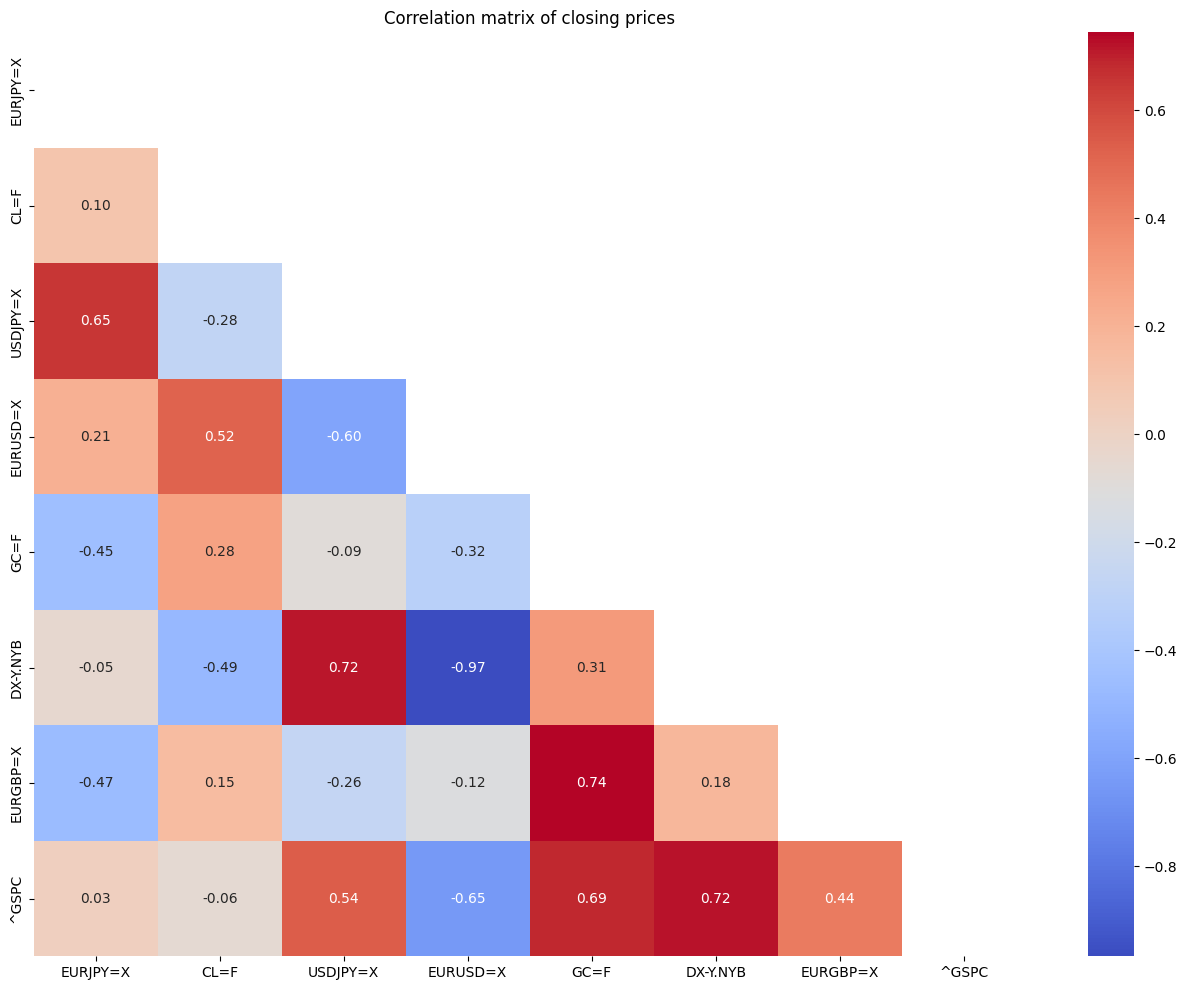

In [13]:
corr_matrix = close_data.dropna().corr()

# Create a mask to hide the upper triangle of the correlation matrix (since it's mirrored around its main diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Sort the correlation matrix
sorted_corr_matrix = corr_matrix.abs().unstack().sort_values(kind="quicksort").reset_index()
sorted_corr_matrix = sorted_corr_matrix[sorted_corr_matrix['level_0'] != sorted_corr_matrix['level_1']]

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)

plt.title('Correlation matrix of closing prices')
plt.show()

In [24]:
min_data = yf.download(
    tickers=" ".join(tickers),
    period="7d",
    interval="1m",
    group_by='ticker',
    auto_adjust=True,
    prepost=True,
    threads=True,
    proxy=None
)

[*********************100%***********************]  8 of 8 completed


In [25]:
min_data.dropna()

^GSPC                                         \
                                  Open         High          Low        Close   
Datetime                                                                        
2023-07-06 13:30:00+00:00  4422.620117  4422.620117  4407.500000  4408.899902   
2023-07-06 13:31:00+00:00  4408.939941  4409.009766  4407.819824  4408.209961   
2023-07-06 13:32:00+00:00  4407.790039  4408.250000  4404.819824  4404.819824   
2023-07-06 13:33:00+00:00  4404.970215  4405.430176  4401.649902  4401.649902   
2023-07-06 13:34:00+00:00  4401.569824  4401.990234  4399.600098  4401.660156   
...                                ...          ...          ...          ...   
2023-07-12 20:14:00+00:00  4472.160000  4472.160000  4472.160000  4472.160000   
2023-07-12 20:15:00+00:00  4472.160000  4472.160000  4472.160000  4472.160000   
2023-07-12 20:16:00+00:00  4472.160000  4472.160000  4472.160000  4472.160000   
2023-07-12 20:17:00+00:00  4472.160000  4472.160000  4472.160000  4472.160000   
2023-07-12 20:18:00+00:00  4472.160000  4472.160000  4472.160000  4472.160000   

                                            CL=F                        \
                               Volume       Open       High        Low   
Datetime                                                                 
2023-07-06 13:30:00+00:00         0.0  71.620003  71.620003  71.500000   
2023-07-06 13:31:00+00:00  13829295.0  71.529999  71.610001  71.480003   
2023-07-06 13:32:00+00:00  11075583.0  71.570000  71.599998  71.510002   
2023-07-06 13:33:00+00:00   8976300.0  71.580002  71.599998  71.540001   
2023-07-06 13:34:00+00:00   9697799.0  71.570000  71.629997  71.550003   
...                               ...        ...        ...        ...   
2023-07-12 20:14:00+00:00     49000.0  75.879997  75.900002  75.870003   
2023-07-12 20:15:00+00:00     81000.0  75.889999  75.889999  75.879997   
2023-07-12 20:16:00+00:00     97000.0  75.889999  75.889999  75.870003   
2023-07-12 20:17:00+00:00    103000.0  75.879997  75.910004  75.879997   
2023-07-12 20:18:00+00:00     33000.0  75.889999  75.910004  75.889999   

                                             ...    EURJPY=X              \
                               Close Volume  ...        Open        High   
Datetime                                     ...                           
2023-07-06 13:30:00+00:00  71.529999  654.0  ...  156.903000  156.929993   
2023-07-06 13:31:00+00:00  71.570000  543.0  ...  156.910004  156.923996   
2023-07-06 13:32:00+00:00  71.589996  413.0  ...  156.906006  156.919006   
2023-07-06 13:33:00+00:00  71.580002  300.0  ...  156.897995  156.901001   
2023-07-06 13:34:00+00:00  71.620003  244.0  ...  156.848007  156.863007   
...                              ...    ...  ...         ...         ...   
2023-07-12 20:14:00+00:00  75.889999  228.0  ...  154.167007  154.177994   
2023-07-12 20:15:00+00:00  75.889999  258.0  ...  154.166000  154.171997   
2023-07-12 20:16:00+00:00  75.879997   82.0  ...  154.164993  154.173004   
2023-07-12 20:17:00+00:00  75.889999  229.0  ...  154.169998  154.173004   
2023-07-12 20:18:00+00:00  75.900002  136.0  ...  154.160004  154.171005   

                                                         EURGBP=X           \
                                  Low       Close Volume     Open     High   
Datetime                                                                     
2023-07-06 13:30:00+00:00  156.888000  156.906998    0.0  0.85345  0.85360   
2023-07-06 13:31:00+00:00  156.886002  156.904999    0.0  0.85360  0.85379   
2023-07-06 13:32:00+00:00  156.888000  156.899002    0.0  0.85378  0.85385   
2023-07-06 13:33:00+00:00  156.843994  156.850006    0.0  0.85378  0.85388   
2023-07-06 13:34:00+00:00  156.839005  156.852005    0.0  0.85387  0.85390   
...                               ...         ...    ...      ...      ...   
2023-07-12 20:14:00+00:00  154.160004  154.167007    0.0  0.85704  0.85710   
2023-07-12 20:15

In [49]:
from datetime import datetime as dt
from datetime import timedelta as td

In [50]:
previous_day = (dt.now() - td(days=1)).date()

# Convert the index to date
min_close_data.index = min_close_data.index.date

# Select rows with the previous day
previous_day_data = min_close_data[min_close_data.index == previous_day]


In [52]:
previous_day_data.fillna(las)

,^GSPC,CL=F,EURUSD=X,DX-Y.NYB,USDJPY=X,GC=F,EURJPY=X,EURGBP=X
2023-07-12,4476.290039,75.750000,1.108770,100.970001,139.072006,1957.500000,154.145996,0.85334
2023-07-12,4477.149902,75.919998,1.108770,100.963997,139.063004,1958.300049,154.139008,0.85329
2023-07-12,4477.529785,76.010002,1.108770,100.953003,139.011002,1958.900024,154.095993,0.85337
2023-07-12,4478.569824,75.900002,1.108647,100.953003,138.983994,1959.000000,154.056000,0.85348
2023-07-12,4478.250000,75.889999,1.108525,100.966003,139.035995,1957.400024,154.108994,0.85348
...,...,...,...,...,...,...,...,...
2023-07-12,4472.160000,75.889999,1.113834,100.555000,138.457001,1963.000000,154.167007,0.85707
2023-07-12,4472.160000,75.889999,1.113834,100.556999,138.457993,1963.000000,154.164993,0.85703
2023-07-12,4472.160000,75.879997,1.113834,100.553001,138.453995,1963.300049,154.171997,0.85710
2023-07-12,4472.160000,75.889999,1.113834,100.556000,138.455994,1963.300049,154.160004,0.85700


In [42]:
str(min_close_data.index.max())[:10]

'2023-07-13'

In [53]:

# Keep only the 'Close' column for each instrument
min_close_data = min_data.xs('Close', level=1, axis=1)
min_close_data = min_close_data.fillna(method='ffill')

# Calculate the correlation matrix for the weekly data
weekly_corr_matrix = min_close_data.dropna().corr()

previous_day = (dt.now() - td(days=1)).date()

# Convert the index to date
min_close_data.index = min_close_data.index.date

# Select rows with the previous day
previous_day_data = min_close_data[min_close_data.index == previous_day]

# Calculate the correlation matrix for the last day
daily_corr_matrix = previous_day_data.corr()

# Calculate the difference between the all-time correlation and the weekly and daily correlations
weekly_diff_corr_matrix = corr_matrix - weekly_corr_matrix
daily_diff_corr_matrix = corr_matrix - daily_corr_matrix

# Create a mask to hide the upper triangle of the correlation matrix (since it's mirrored around its main diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

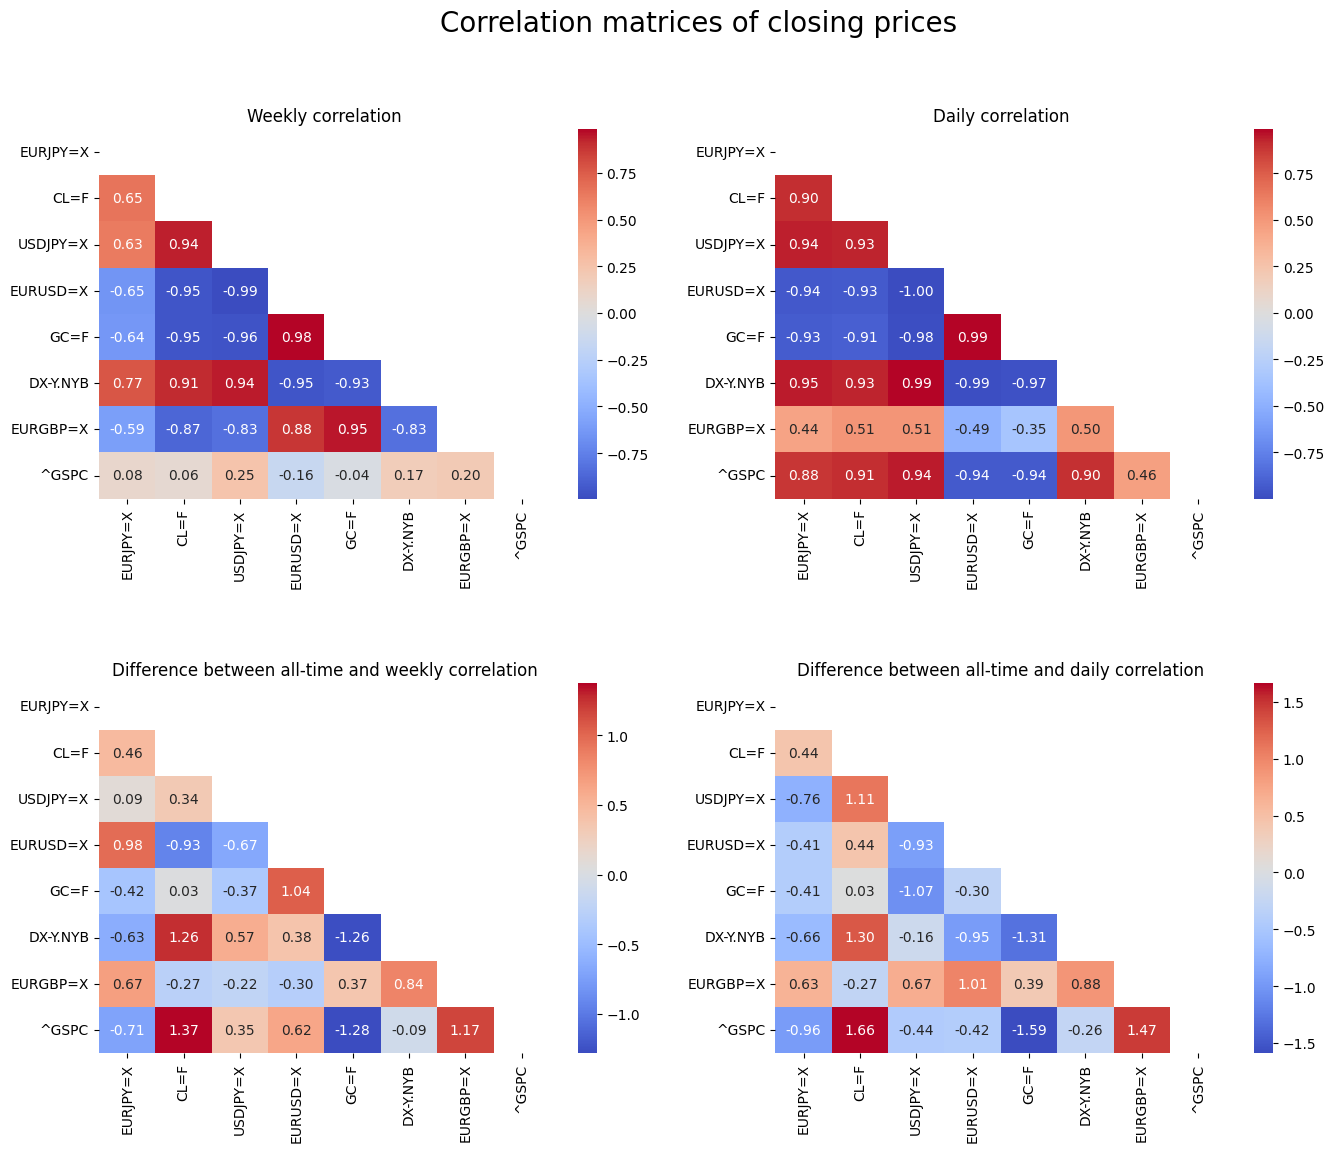

In [54]:

# Create heatmaps
plt.figure(figsize=(16, 12))
plt.suptitle('Correlation matrices of closing prices', fontsize=20)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.subplot(2, 2, 1)
sns.heatmap(weekly_corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Weekly correlation')

plt.subplot(2, 2, 2)
sns.heatmap(daily_corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Daily correlation')

plt.subplot(2, 2, 3)
sns.heatmap(weekly_diff_corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Difference between all-time and weekly correlation')

plt.subplot(2, 2, 4)
sns.heatmap(daily_diff_corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Difference between all-time and daily correlation')

plt.show()

In [17]:
weekly_corr_matrix

,DX-Y.NYB,USDJPY=X,EURUSD=X,^GSPC,CL=F,EURGBP=X,GC=F,EURJPY=X
DX-Y.NYB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USDJPY=X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EURUSD=X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
^GSPC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CL=F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EURGBP=X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC=F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EURJPY=X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
weekly_data

,^GSPC,CL=F,EURUSD=X,DX-Y.NYB,USDJPY=X,GC=F,EURJPY=X,EURGBP=X
Datetime,,,,,,,,
2023-07-09 00:00:00+00:00,4398.95,73.570000,1.096972,102.290001,142.210007,1930.500000,155.960007,0.85419
2023-07-16 00:00:00+00:00,4472.16,75.860001,1.114330,100.473000,138.337006,1964.699951,154.123993,0.85591
